##### 建立圖文選單
在行動版的 LINE 裡，有時會出現「圖文選單」的功能 ( 最下方可以點選的圖文區塊 )，這篇教學將會介紹如何在 LINE 官方帳號開啟基本圖文選單功能，\
以及如何透過 Python 程式產生客製化的圖文選單。

##### 什麼是 LINE 圖文選單？ 
LINE 圖文選單位於行動版的聊天室畫面下方，是一個可以彈出與收合的選單，使用者不管是因為推播或其他互動打開您的官方帳號時，\
都能看到這個選單，舉凡「外導連結」、「優惠券」、「集點卡」及「關鍵字」都能設定。

以下圖為例，下方台新知識王的區塊，就是圖文選單。

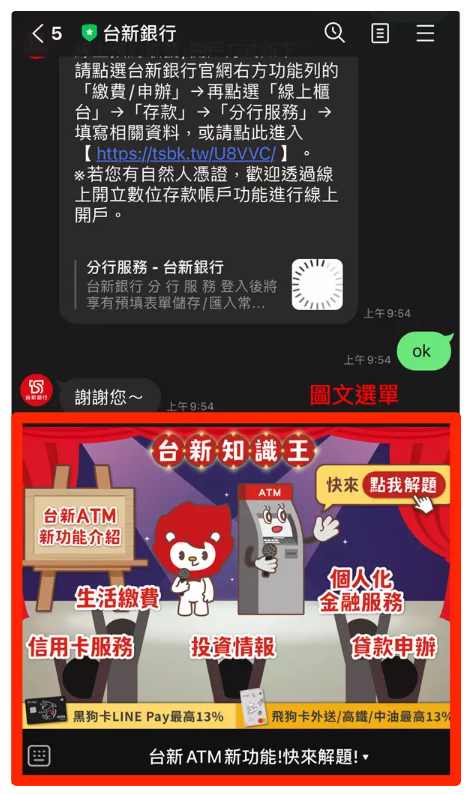

##### LINE 官方帳號建立圖文選單 
進入 LINE 的官方帳號，選擇要建立圖文選單的官方帳號 ( 官方帳號可能是手動建立，或建立 LINE BOT 時自動產生 )。

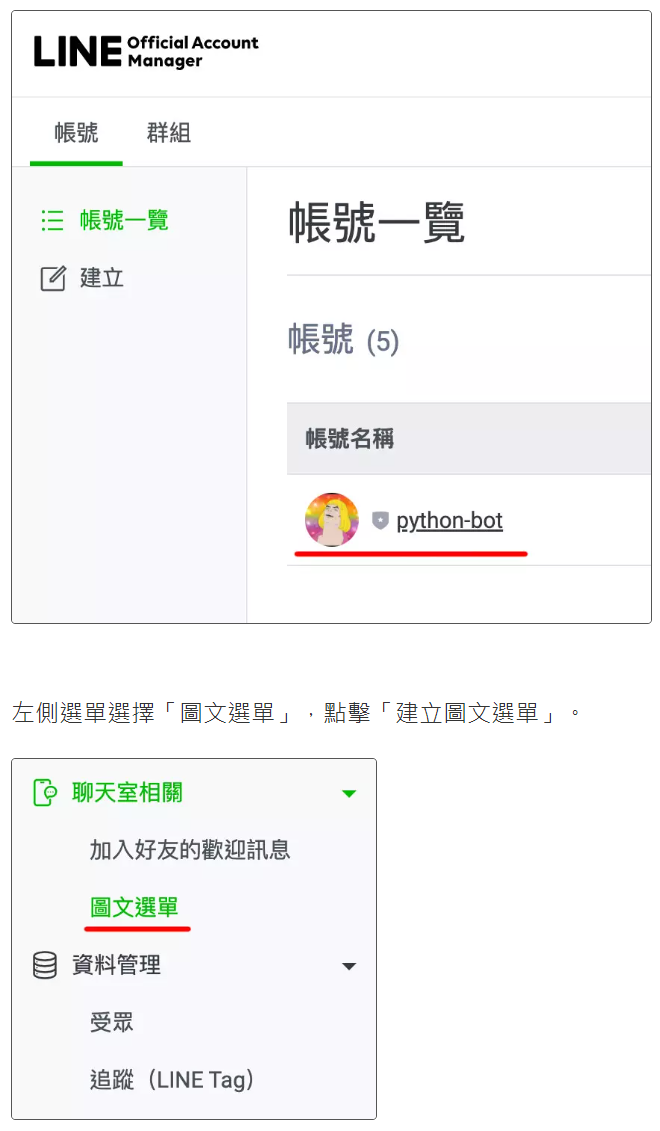

建立時需要填寫「標題」、「時間」、「選單顯示的文字」和「預設顯示方式」。

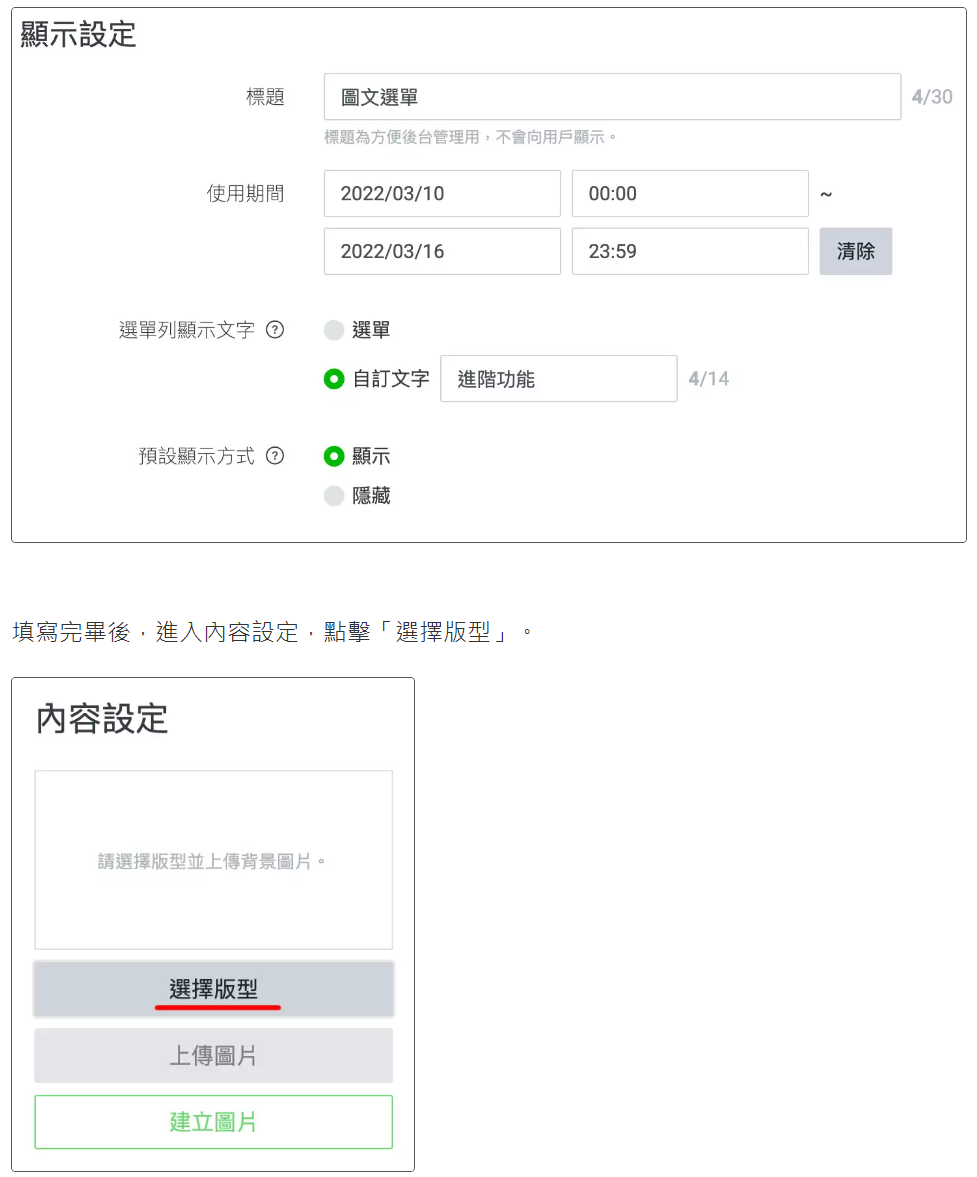

從預設的版型中，挑選需要的樣式，樣式裡每個格子都是一個「按鈕」，也就是使用者可以點擊的區域。

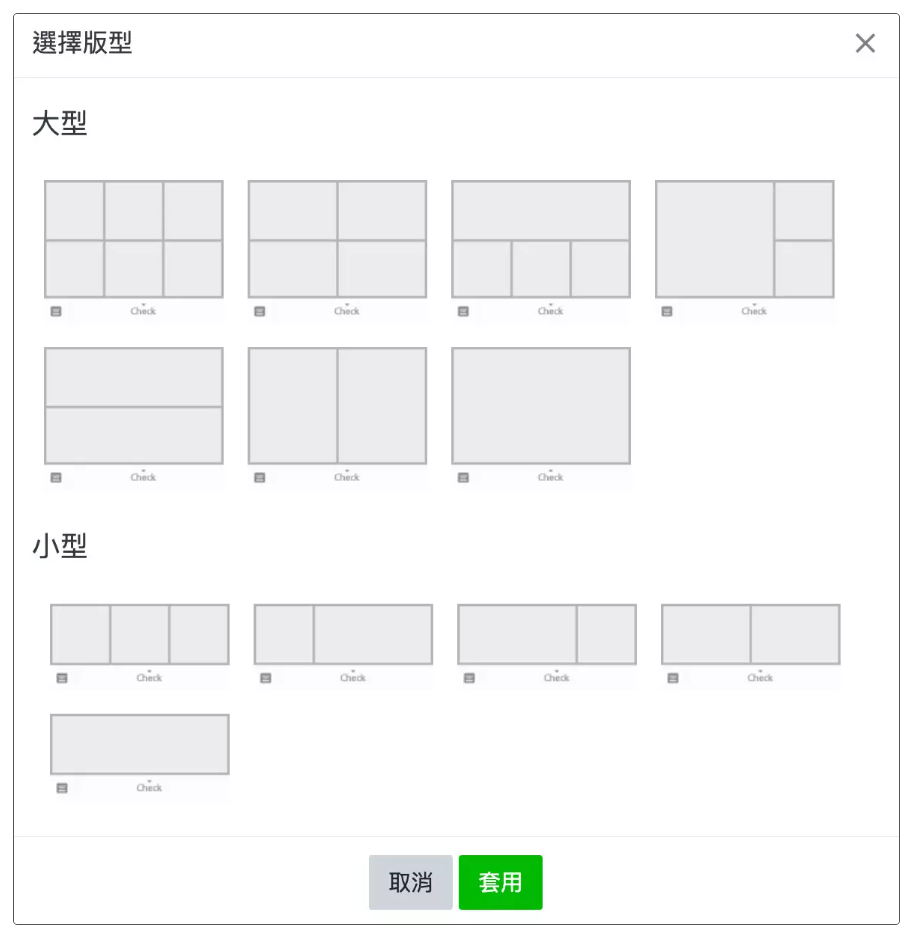

樣式設定後，就能替樣式裡每個按鈕格子加入圖片 ( 或使用單一張背景圖 )。

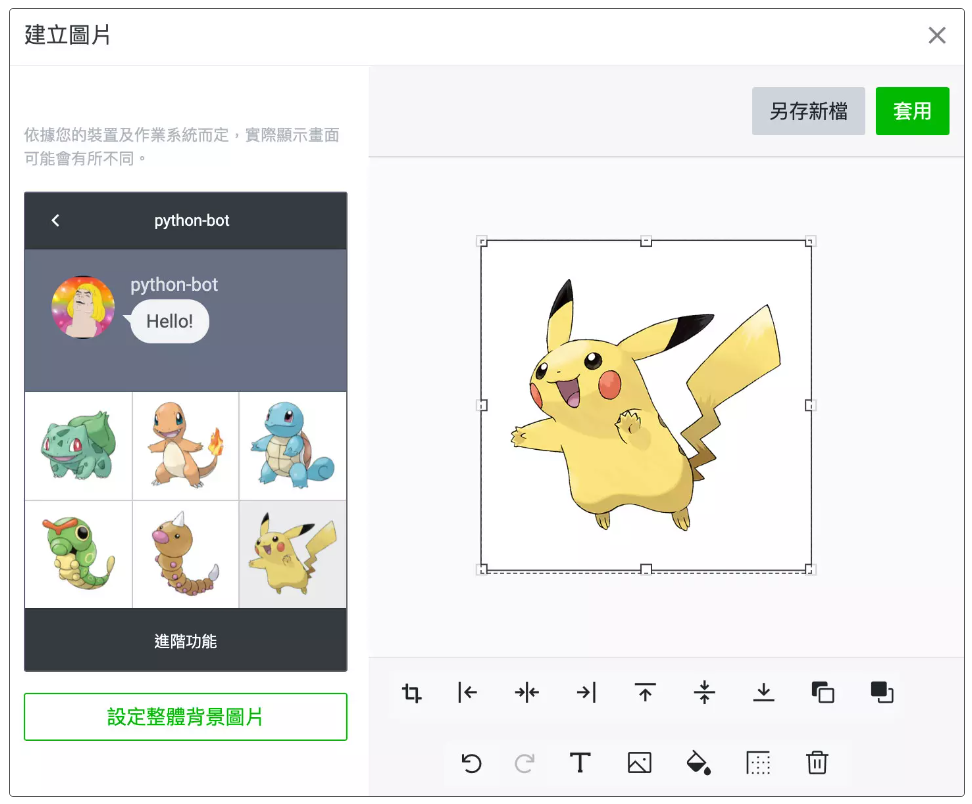

最後在「動作」的位置，設定點擊每個按鈕時要進行的動作，可以設定發送文字、開啟連結...等功能。

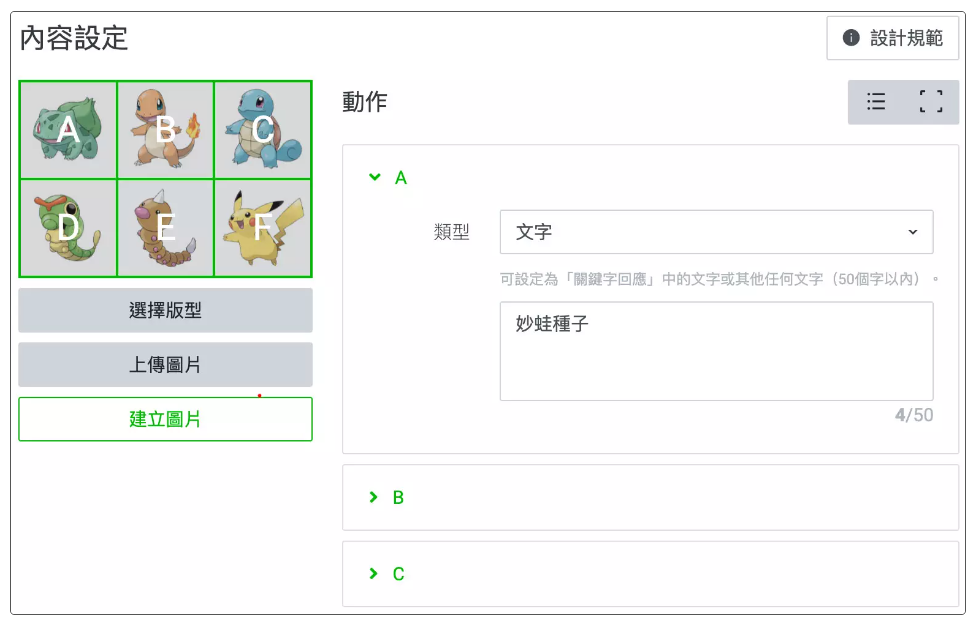

完成後按下建立，在設定的時間範圍裡從 LINE 開啟與官方帳號的聊天視窗，就會看見下方出現圖文選單 ( 有時需要等待一兩分鐘才會出現 )，點擊選單就會出現設定的動作。

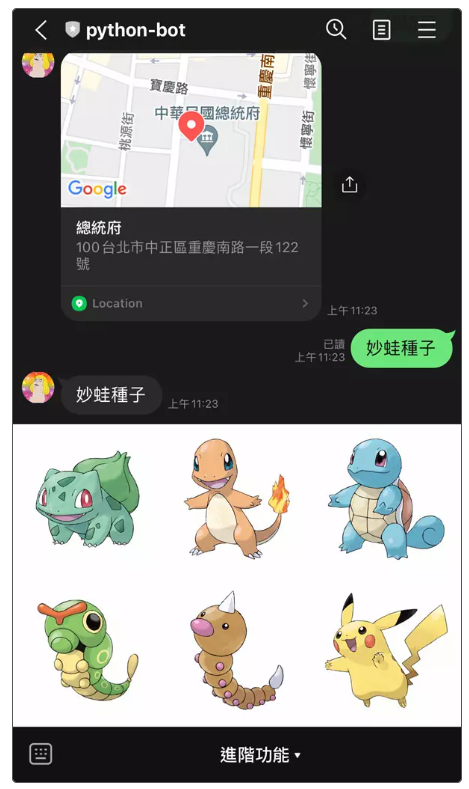

##### Python 建立圖文選單 
除了透過 LINE 官方帳號建立圖文選單，也可以按照下列步驟，使用 Python 設計出更有創意的圖文選單樣式。

##### 步驟 1、建立 Colab 專案，並與 Google Drive 連動
開啟 Colab，建立一個專案，勾選「掛載雲端硬碟」的圖示，使 Colab 專案和 Google Drive 連動。

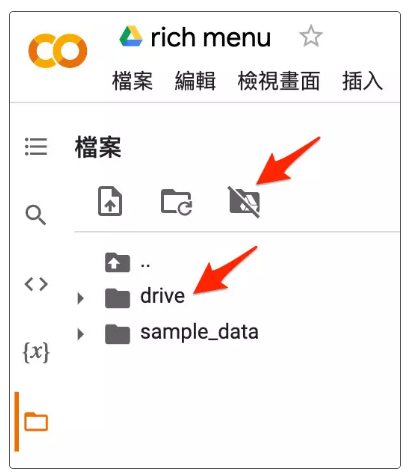

##### 步驟 2、設計背景圖片
首先準備一張背景圖片，圖片的格式要求如下：
* 寬度：800～2500 px( 實際大小取決於圖文選單設定 )
* 高度：250～1686 px ( 實際大小取決於圖文選單設定 )
* 長寬比：保持 1.45～1.5
* 格式：jpg 或 png
* 範例圖片為一個商場的插畫，裡面包含七個按鈕 ( 範例圖片下載 )，記錄每個按鈕的 xy 座標以及長寬，準備好圖片後，將圖片上傳到 Google Drive 雲端空間裡，上傳的位置和 Colab 專案放在一起。

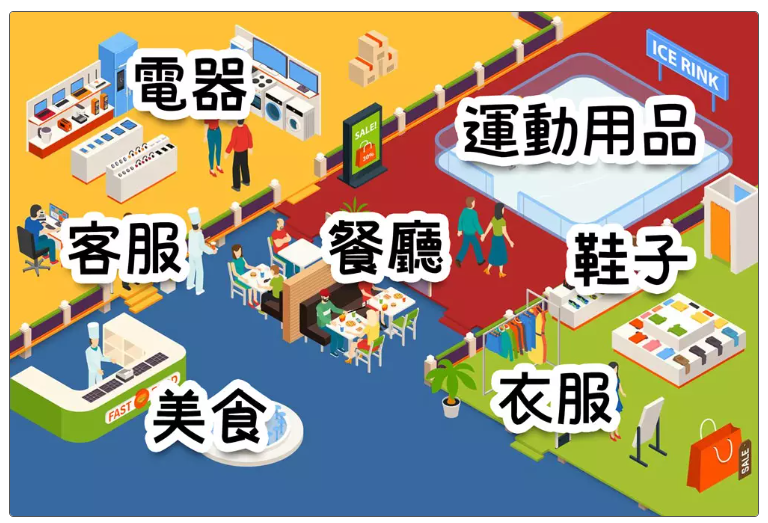

##### 步驟 3、Colab 建立圖文選單
開啟 Colab，建立一個專案，輸入下方指令安裝 line-bot-sdk。
* !pip install line-bot-sdk

按照 LINE 官方提供的方法，在 Colab 的專案裡輸入下方的程式碼，執行後會使用 POST 的方法向指定網址發送 request，建立圖文選單。

執行程式後就會建立圖文選單，並得到圖文選單的 ID。

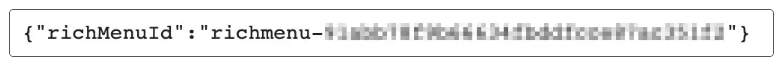

In [ ]:
import requests
import json
# 設定 headers，輸入你的 Access Token，記得前方要加上「Bearer 」( 有一個空白 )
headers = {'Authorization':'Bearer 你的 Access Token','Content-Type':'application/json'}

body = {
    'size': {'width': 2500, 'height': 1686},   # 設定尺寸
    'selected': 'true',                        # 預設是否顯示
    'name': 'Richmenu demo',                   # 選單名稱
    'chatBarText': 'Richmenu demo',            # 選單在 LINE 顯示的標題
    'areas':[                                  # 選單內容
        {
          'bounds': {'x': 341, 'y': 75, 'width': 560, 'height': 340}, # 選單位置與大小
          'action': {'type': 'message', 'text': '電器'}                # 點擊後傳送文字
        },
        {
          'bounds': {'x': 1434, 'y': 229, 'width': 930, 'height': 340},
          'action': {'type': 'message', 'text': '運動用品'}
        },
        {
          'bounds': {'x': 122, 'y': 641, 'width':560, 'height': 340},
          'action': {'type': 'message', 'text': '客服'}
        },
        {
          'bounds': {'x': 1012, 'y': 645, 'width': 560, 'height': 340},
          'action': {'type': 'message', 'text': '餐廳'}
        },
        {
          'bounds': {'x': 1813, 'y': 677, 'width': 560, 'height': 340},
          'action': {'type': 'message', 'text': '鞋子'}
        },
        {
          'bounds': {'x': 423, 'y': 1203, 'width': 560, 'height': 340},
          'action': {'type': 'message', 'text': '美食'}
        },
        {
          'bounds': {'x': 1581, 'y': 1133, 'width': 560, 'height': 340},
          'action': {'type': 'message', 'text': '衣服'}
        }
    ]
  }
# 向指定網址發送 request
req = requests.request('POST', 'https://api.line.me/v2/bot/richmenu',
                      headers=headers,data=json.dumps(body).encode('utf-8'))
# 印出得到的結果
print(req.text)

步驟 4、設定選單背景
取得圖文選單的 ID 後，在同一個 Colab 專案裡，新增另外一組程式碼編輯區塊，輸入 Channel Access Token 和剛剛產生的 Rich menu ID，\
完成並執行後，就會將圖片上傳到 LINE 並與剛剛的圖文選單綁定。

In [ ]:
from linebot import LineBotApi, WebhookHandler

line_bot_api = LineBotApi('你的 Access Token')

with open('/content/drive/MyDrive/Colab Notebooks/demo.jpg', 'rb') as f:
    line_bot_api.set_rich_menu_image('你的圖文選單 ID', 'image/jpeg', f)

步驟 5、顯示圖文選單
最後，在同一個 Colab 專案裡，新增另外一組程式碼編輯區塊，輸入 Channel Access Token 和剛剛產生的 Rich menu ID，完成並執行後，\
在行動裝置上開啟 LINE BOT 的聊天視窗，下方就會出現圖文選單，點擊圖文選單，就會發送指定的文字訊息。

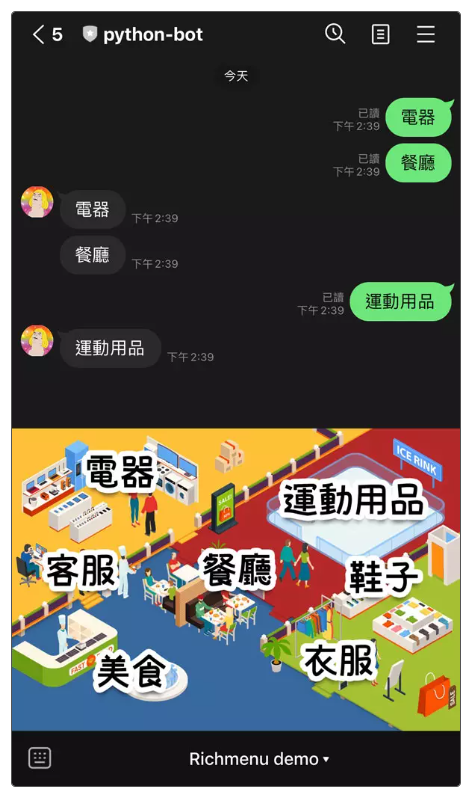

In [ ]:
import requests

headers = {'Authorization':'Bearer 你的 Access Token'}

req = requests.request('POST', 'https://api.line.me/v2/bot/user/all/richmenu/你的圖文選單 ID', headers=headers)

print(req.text)

##### Python 其他圖文選單方法 
除了建立圖片選單，還有其他的方法可以操作圖文選單 ( 參考：完整指令 )，下方的程式碼執行後，可以取得目前所有已經建立的圖文選單 ID。

In [ ]:
from linebot import  LineBotApi, WebhookHandler
line_bot_api = LineBotApi('你的 Access Token')
rich_menu_list = line_bot_api.get_rich_menu_list()
for rich_menu in rich_menu_list:
    print(rich_menu.rich_menu_id)

下方的程式碼可以根據圖文選單的 ID，刪除指定的圖文選單。

In [ ]:
from linebot import LineBotApi, WebhookHandler
line_bot_api = LineBotApi('你的 Access Token')
line_bot_api.delete_rich_menu('圖文選單 ID')

##### 圖文選單物件格式 
上方的程式碼只使用了「message」的格式進行發送，但 LINE 其實提供了許多圖文選單的物件格式，\
例如 uri ( 超連結 )、location ( 地點 )...等，舉例來說，如果將上方的範例中「運動用品」的內容改成下方的程式碼，\
執行後，點擊運動用品按鈕時，就會開啟網頁。

In [ ]:
{
  'bounds': {'x': 1434, 'y': 229, 'width': 930, 'height': 340},
  'action': {'type': 'uri', 'label': '運動用品', 'uri':'https://www.oxxostudio.tw'} # 點擊後開啟網頁
},

##### 小結 
LINE 的圖文選單為行動裝置的操作者，提供了相當方便的使用體驗，因為使用點擊發送訊息的速度，遠比用手指打字來得迅速，活用圖文選單，\
就能替 LINE BOT 增加更多好用的功能。